<a href="https://colab.research.google.com/github/1024-m/projects/blob/main/live-Forecasting-realtimedata-fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[view dataset](https://www.eia.gov/opendata/v1/qb.php?category=371)**
## **[view api info](https://www.eia.gov/opendata/documentation.php)**
## **[view report](https://docs.google.com/document/d/1NNzm5z9yG9OXL_WrnP5-rUQqAjRtia1EY-uvsQepavk/edit?usp=sharing)**
## **[view code](https://colab.research.google.com/drive/1RpIgTTBQrIvrWwR8dc_DqIa7ZKuLJAnw?usp=sharing)**
## **[view frontend](https://su44d5tsitjmgt4q.anvil.app/4BSGCYP4354CO74O63W6VDVP)** *run notebook before opening*

#**PART - 1 :** **DATA EXTRACTION**

In [ ]:
!pip install prophet                                                                                                ## INSTALLING FBPROPHET PACKAGE       FOR TIME SERIES FORECASTING
#!pip install EIA_python              # THIS POS GOT DISCONTINUED FROM DEC 9 2022                                   ## INSTALLING EIA       PACKAGE       FOR EIA DATASET EXTRACTION
from prophet import Prophet                                                                                         ## IMPORTING FBPROPHET                FOR TIME SERIES MODELLING AND FORECASTING 
import plotly                                                                                                       ## IMPORTING PLOTLY                   FOR PLOTTING DATAFRAME DATA
from sklearn.preprocessing import MinMaxScaler                                                                      ## IMPORTING MINMAXSCALER             FOR NORMALIZATION AND DENORMALIZATION
import warnings                                                                                                     ## IMPORTING WARNINGS                 FOR SUPPRESSING WARNINGS THAT ARISE
#import eia                                                                                                          ## IMPORTING EIA                      FOR EXTRACTING DATA USING EIA API 
import matplotlib.pyplot as plt                                                                                     ## IMPORTING MATPLOTLIB               FOR PLOTTING DATAFRAME AND MODEL DATA
import pandas as pd                                                                                                 ## IMPORTING PANDAS
import numpy as np                                                                                                  ## IMPORTING NUMPY
import datetime 
#def retrieve_time_series(api, series_ID):                                                                           ## FUNCTION TO RETRIEVE DATASET USING "api" AND "series_id"
#    series_search = api.data_by_series(series=series_ID)                                                               ##  SEARCH FOR REQUIRED DATASET USING "series_id"
#    df = pd.DataFrame(series_search)                                                                                   ##  EXTRACT THE DATASET FOUND USING SERIES ID AS A DATAFRAME
#    return df                                                                                                          ##  RETURN THE DATAFRAME
#api_key = "j9K3z6lVborHe4TCvelVBDWhczxqn5pb2DVSJ2Ek"                                                                ## UNIQUE API KEY FOR MY ACCOUNT , USUALLY A 40 LENGHT ALPHANUMERIC SEQUENCE 
#api = eia.API(api_key)                                                                                              ## ASSIGN THIS UPI KEY TO "api"
#series_ID='NUC_STATUS.OUT_PCT.US.D'                                                                                 ## UNIQUE SERIES ID FOR THIS DATASET
#df=retrieve_time_series(api, series_ID)                                                                             ## RETREIVE DATASET USING THE "api_key" AND "series_id"
from bs4 import BeautifulSoup
import urllib.request
import requests as requests
from urllib.request import Request, urlopen
## THIS API HAS BEEN DISCONTINUED FROM DEC 9TH
url = 'https://www.eia.gov/opendata/v1/qb.php?category=2889994&sdid=NUC_STATUS.OUT_PCT.US.D'
data_primary = Request(url)
html_page = urlopen(data_primary)
soup = BeautifulSoup(html_page, "html.parser")
html_text = soup.get_text()
f = open("html_text.html", "w") 
for line in html_text:
	f.write(line)
f.close 
page = requests.get(url)
soup = BeautifulSoup(page.text,'html.parser')
dfs = pd.read_html(page.text)
df = dfs.pop(0)
print(df)                                                                                                           ## PRINT THE DATAFRAME

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                                      Series Name    Period Frequency  Value  \
0     U.S. nuclear capacity percent outage, daily  20221209         D   7.08   
1     U.S. nuclear capacity percent outage, daily  20221208         D   7.83   
2     U.S. nuclear capacity percent outage, daily  20221207         D   7.87   
3     U.S. nuclear capacity percent outage, daily  20221206         D   7.01   
4     U.S. nuclear capacity percent outage, daily  20221205         D   7.00   
...                                           ...       ...       ...    ...   
5817  U.S. nuclear capacity percent outage, daily  20070105         D   1.85   
5818  U.S. nuclear capacity percent outage, daily  20070104         D   2.54   
5819  U.S. nuclear capacity percent outage, daily  20070103         D   1.52   
5820  U.S. nuclear capacity percent outage, daily  20070102         D   1.65   
5821  U.S. nuclear ca

#**PART - 2 :** **DATA MANIPULATION**

In [ ]:
#df.reset_index(inplace=True)                                                                    ## RESET INDEX TO GET THE DATE VALUES IN THE INDEX AS A SEPERATE COLUMN IN THE DATAFRAME
#df = df.rename(columns ={'index':'date'})                                                       ## RENAME THE OLD INDEX COLUMN AS "date"
#df["date"] = df["date"].str[:9]                                                                 ## EXTRACT THE FIRST 9 CHARACTERS OF EACH CELL IN THE "date" COLUMN SINCE ITS IN "yyyy mmdd dd" FORMAT
#df["date"] = df["date"].str.replace(" ","")                                                     ## REMOVE THE SPACE IN THE "yyyy mmdd" EXTRACTED PART
df = df.drop("Series Name",axis=1)
df = df.drop("Frequency",axis=1)
df = df.drop("Units",axis=1)
df = df.rename(columns={"Period":"date","Value":"outage"})
df = df.loc[::-1]                                                                               ## REVERSE ROW ORDER TO GET LATEST VALUES ON TOP AND OLD ONES ON THE BOTTOM
# df["date"] = pd.to_datetime(df["date"])
df["date"] = df["date"].astype(str)
df = df[-2500:]                                                                                 ## BETTER METRICS ARE OBSERVED CONSIDERING ONLY THE LATEST 2.5K IMAGES INSATED OF ~5.8K (trail&error)
df = df.reset_index(drop=True)                                                                  ## RESET INDEX SINCE IT TOO GETS REVERSED , ALSO DROPPING THE OLD INDEX COLUMN
#df = df.rename(columns={"U.S. nuclear capacity percent outage, daily (percent)":"outage"})      ## RENAMED THE OUTAGE COLUMN FOR EASE OF TYPING DURING REST OF THE CODE
df["date"] = pd.to_datetime(df["date"])                                                    ## CHANGE THE "date" COLUMN FORMAT FROM FLOAT64 TO DATETIME
df = df.rename(columns={"date":"ds","outage":"y"})                                              ## RENAME COLUMNS TO "ds" AND "y" FOR COMPATIBILITY WITH FBPROPHET
print(df)                                                                                       ## PRINT THE DATA AFTER DATA MANIPULATION 
miny = df["y"].min()                                                                            ## ASSIGN MINIMUM VALUE OF OUTAGES TO "miny" FOR USE DURING DENORMALIZATION
maxy = df["y"].max()                                                                            ## ASSIGN MAXIMUM VALUE OF OUTAGES TO "maxy" FOR USE DURING DENORMALIZATION
df["y"] = MinMaxScaler().fit_transform(np.array(df["y"]).reshape(-1,1))                         ## NORMALIZE THE VALUES OF OUTAGES FOR BETTER MODEL FITTING
df0=df                                                                                          ## SAVING A COPY OF THIS DATAFRAME (ACTUAL VALUES) FOR COMPUTING FORECAST METRICS AT THE END

             ds     y
0    2016-02-05  6.63
1    2016-02-06  6.57
2    2016-02-07  6.08
3    2016-02-08  8.17
4    2016-02-09  9.42
...         ...   ...
2495 2022-12-05  7.00
2496 2022-12-06  7.01
2497 2022-12-07  7.87
2498 2022-12-08  7.83
2499 2022-12-09  7.08

[2500 rows x 2 columns]


#**PART - 3 :** **MODEL CREATION**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazeh6pqu/08p91a6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazeh6pqu/fe_87676.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16146', 'data', 'file=/tmp/tmpazeh6pqu/08p91a6k.json', 'init=/tmp/tmpazeh6pqu/fe_87676.json', 'output', 'file=/tmp/tmpazeh6pqu/prophet_model5rjfrixg/prophet_model-20221211053949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


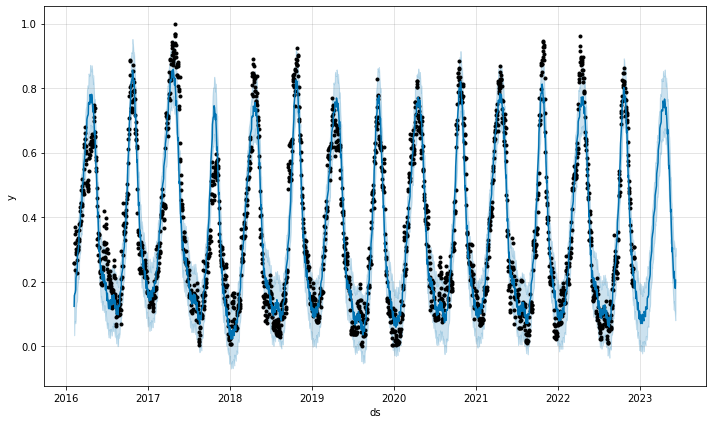

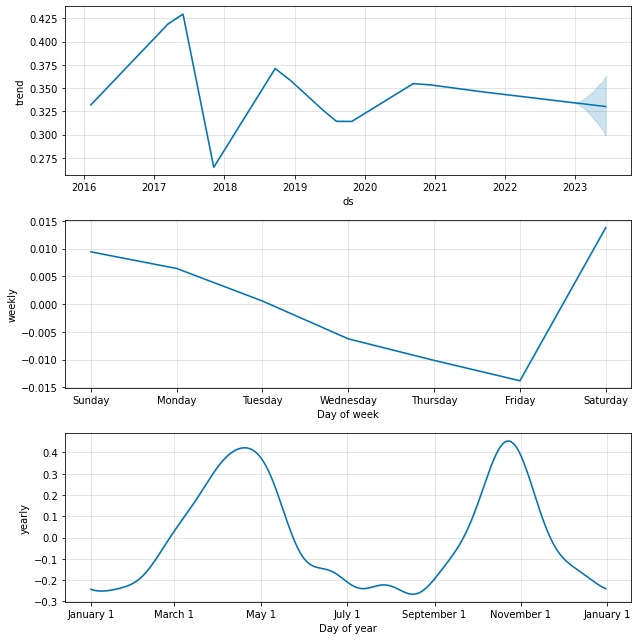

In [ ]:
m=Prophet()                                                                     ## CREATE OBJECT USING FBPROPHET AND ASSIGN IT TO "m"
model = m.fit(df)                                                               ## FIT THE DATAFRAME "df" IN A MODEL
prediction_time = "183D"                                                        ## PREDICTION TIME IS THE LENGHT OF TIME AHEAD WE ARE PREDICTING TO DIAPLY IN A PLOT
                                                                                ## "183D" WAS TAKEN AS PREDICTION TIME , SINCE THE SEASONALITY OF THE MODEL IS 183 DAYS
future = m.make_future_dataframe(periods=183,freq="D")                          ## MAKING A FUTURE DATAFRAME FOR PREDICTED VALUES FOR NEXT 183 DAYS
                                                                                ## FREQ = "D" INDICATES FORECASTS ARE MADE FOR EACH DAY [ USE "H" FOR HOUR ,"W" FOR WEEK ,etc...]
forecast = m.predict(future)                                                    ## STORE PREDICTED VALUES IN FORECAST DATAFRAME
forecast.tail()                                                                 ## DISPLAY SOME FORCAST VALUES
import plotly.io as pio                                                         ## IMPORTING PLOTLY.IO                  TO DISPLAY PLOT OF MODEL
pio.renderers.default = 'colab'                                                 ## CHANGE DEFAULT RENDER MODE TO GOOGLE COLAB
import plotly.graph_objs as go                                                  ## IMPORTING PLOTLY.GRAPHS              TO DISPLAY GRAPHS OF ACTUALS AND PREDICTIONS
import plotly.offline as py                                                     ## IMPORTING PLOTLY.OFFLINE
from plotly.offline import init_notebook_mode                                   ## IMPORTING INIT_NOTEBOOK_MODE
import plotly.offline as py                                                     ## IMPORTING PLOTLY.OFFLINE
py.init_notebook_mode(connected=True)                                           ## CONNECTING THE NOTEBOOK
import plotly.io as pio                                                         ## IMPORTING PLOTLY.IO                  TO DISPLAY PLOT OF MODEL
pio.renderers.default = 'colab'                                                 ## CHANGE DEFAULT RENDER MODE TO GOOGLE COLAB
from plotly.offline import iplot                                                ## IMPORTING PLOTLY.OFFLINE
df_forecast = forecast.copy()                                                   ## SAVE A COPY OF FORECAST VALUES IN "df_forecast" DATAFRAME
df0 = df.copy()                                                                 ## SAVE A COPY OF DATAFRAME "df" IN "df0"
trace1 = go.Scatter(                                                            
                            name = 'trend',
                            mode = 'lines',
                            x = list(df_forecast['ds']),                        ## TRACE 1 DISPLAYS THE TRUE PREDICTED VALUES , TYPE : LINE , WIDTH : 3 , COLOR : RED
                            y = list(df_forecast['yhat']),                      ## TRUE PREDICTED VALUES INDICATE THAT 50% OF ACTUAL VALUES LIE ABOVE THIS LINE, 50% LIE BELOW THIS LINE
                            marker=dict(
                                            color='red',
                                            line=dict(width=3)
                                       )
                   )
upper_band = go.Scatter(
                            name = 'upper band outage%',
                            mode = 'lines',
                            x = list(df_forecast['ds']),                        ## UPPER_BAND DISPLAYS UPPER PREDICTION VALUES , TYPE : LINE, WIDTH : 3 , COLOR : GREEN
                            y = list(df_forecast['yhat_upper']),                ## UPPER PREICTION VALUES INDICATE , 99.5% OF ACTUAL VALUES ARE BELOW THIS LINE , 0.5% ARE ABOVE THIS LINE
                            line= dict(color='green'),
                            fill = 'tonexty'
                       )
lower_band = go.Scatter(
                            name= 'lower band outage %',
                            mode = 'lines',
                            x = list(df_forecast['ds']),                        ## LOWER_BAND DISPLAYS LOWER PREDICTION VALUES , TYPE : LINE , WIDTH : 3 , COLOR : BLUE
                            y = list(df_forecast['yhat_lower']),                ## LOWER PREDICTION VALUES INDICATE , 99.5% OF ACTUAL VALUES LIE ABOVE THIS LINE , 0.5% ARE BELOW THIS LINE
                            line= dict(color='blue')
                       )
tracex = go.Scatter(
                            name = 'Actual Outage %',
                            mode = 'markers',
                            x = list(df['ds']),                                 ## TRACEX DISPLAYS THE ACTUAL VALUES , TYPE : DOTS , WIDTH : 3 , COLOR : BLACK
                            y = list(df['y']),                                  ## 0.5% LIE BELOW BLUE LINE ,49% LIE BETWEEN BLUE AND RED ,49% LIE BETWEEN RED AND GREEN ,0.5% LIE ABOVE THE GREEN LINE
                            marker=dict(
                                              color='black',
                                              line=dict(width=1)
                                       )
                   )
data = [trace1, lower_band, upper_band,tracex]                                                        ## LIST ALL 4 DATA PLOTS IN LIST "data"
layout = dict(title=f'OUTAGE % PREDICTIONS',xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))    ## DEFINE LAYOUT AND TITLE OF PLOT
figure=dict(data=data,layout=layout)                                                                  ## DEFINE FIGURE BASED ON LAYOUT AND DATA TO PLOT
py.offline.iplot(figure)                                                                              ## USE PY.OFFLINE.IPLOT TO PLOT THE FIGURE
plot1 = m.plot(forecast)                                                                              ## PLOT THE FUTURE TRENDS ALONG WITH ACUTALS USING "yhat_lower" ,"yhat" AND "yhat_upper" 
figure = model.plot_components(forecast)                                                              ## DISPLAY COMPONENTS OF THE FORECAST

#**PART - 4 :** **MODEL FORECASTING**

In [ ]:
df4 = forecast[len(forecast)-365:len(forecast)]                                                             ## TAKING TODAY , NEXT 182 DAYS , PREVIOUS 182 DAYS DATA ( 365 DAYS ) IN DATAFRAME "df4"
df4["ds"] = pd.to_datetime(df4["ds"])                                                                       ## CONVERTING "ds" COLUMN FROM OBJECT TO DATETIME FORMAT
my_forecasts = df4.drop(df4.columns[[1,4,5,6,7,8,9,10,11,12,13,14,15,16,17]],axis=1)                        ## DROPPING UNNECESSARY COLUMNS AND SAVING THE DATAFRAME AS "my_forecasts"
my_forecasts["yhat"] = (my_forecasts["yhat"]*(maxy-miny))+ miny                                             ## DENORMALIZING "yhat"       COLUMN VALUES
my_forecasts["yhat_lower"] = (my_forecasts["yhat_lower"]*(maxy-miny))+ miny                                 ## DENORMALIZING "yhat_lower" COLUMN VALUES
my_forecasts["yhat_upper"] = (my_forecasts["yhat_upper"]*(maxy-miny))+ miny                                 ## DENORMALIZING "yhat_upper" COLUMN VALUES
df["y"] = df["y"]*(maxy-miny) + miny                                                                        ## DENORMALIZING "y" VALUES OF "df" FOR COMPARISION LATER
data = pd.merge(df,my_forecasts,on='ds',how='outer')                                                        ## MERGING ACTUAL DATA AND FORECAST DATA USING "outer join" BASED ON "ds" COLUMN
data["ds"] = pd.to_datetime(data["ds"])                                                                     ## CONVERTING "ds" DATA FROM OBJECT TO DATETIME FORMAT
data = data.sort_values(by="ds")                                                                            ## SORTING MERGED DATA BASED ON DATE USING "ds" COLUMN
data = data.reset_index(drop=True)                                                                          ## RESET THE INEDX AFTER SORTING AND DROPPED PREVIOUS INDEX
data['yhat_lower'].clip(lower=0)                                                                            ## SINCE OUTAGE% LIES BETWEEN 0-100 , CLIPPING "yhat_lower" VALUES TO NON-NEGATIVE (>0)
data2 = data[2318:2510]                                                                                     ## TAKING PREVIOUS 183DAYS DATA INTO CONSIDERATION FOR COMPARISION (SEASONALITY=183 IN THIS)
data2 = data2.round(2)                                                                                      ## ROUNDING DATA TO 2 DECIMAL POINTS IN PREDICTION COLUMNS
data2["ds"] = pd.to_datetime(data2["ds"])                                                                   ## CONVERTING DATA FROM "ds" FROM OBJECT TO DATETIME FORMAT
data2["ds"] = data2["ds"].astype('datetime64[ns]')                                                          ## REMOVING HOURS,MINUTES,SECONDS DATA FROM DATETIME COLUMN "ds"
data2.sort_values(by='ds',inplace=True)                                                                     ## SORTING DATA FROM "data2" BASED ON DATES FROM "ds" COLUMN
data2 = data2.rename(columns={"ds":"date","yhat_upper":"pred(max)","yhat":"pred","yhat_lower":"pred(min)"}) ## RENAMING COLUMNS OF "data2" FOR EASY UNDERSTANDING

<ipython-input-4-c39730c15b25>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**PART - 4A : DISPLAYING FORECASTS AS A CHART PLOT** 📊

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


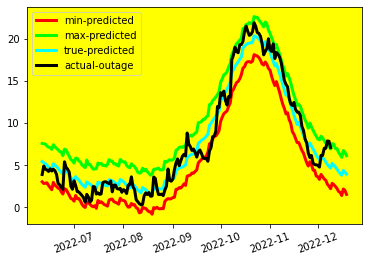

In [ ]:
plt.rcParams['axes.facecolor'] = 'yellow'                                                                     ## SETTING BACKGROUND COLOR AS YELLOW
plt.plot(data2["date"],data2["pred(min)"] ,color="red"  ,linewidth=3,label="min-prediction ")                 ## PLOTTING MINIMUM VALUE OF PREDICTION RANGE AS RED   LINE WITH WIDTH 3
plt.plot(data2["date"],data2["pred(max)"] ,color="lime" ,linewidth=3,label="max-prediction ")                 ## PLOTTING MAXIMUM VALUE OF PREDICTION RANGE AS LIME  LINE WITH WIDTH 3
plt.plot(data2["date"],data2["pred"]      ,color="cyan" ,linewidth=3,label="true-prediction")                 ## PLOTTING TRUE VALUE OF MODEL'S PREDITCION  AS CYAN  LINE WITH WIDTH 3
plt.plot(data2["date"],data2["y"]               ,color="black",linewidth=3,label="true-outage %  ")           ## PLOTTING ORIGINAL VALUES OF OUR DATAFRAME  AS BLACK LINE WITH WIDTH 3 
plt.xticks(rotation = 20)                                                                                     ## ROTATE X AXIS TICKS TO MAKE THEM CLEARLY VISIBLE
plt.legend(['min-predicted','max-predicted','true-predicted','actual-outage'],loc=0)                          ## DISPLAY THE LEGEND OF PLOT [ LOC = 0 INDICATES 'SHOW LEGEND ON BEST DISPLAY POSITION']
from google.colab import drive                                                                                  ## IMPORT DRIVE MODULE FROM GOOGLE.COLAB
drive.mount('/content/gdrive')                                                                                  ## MOUNT GOOGLE DRIVE TO GOOGLE COLAB 
images_dir = '/content/gdrive/My Drive/602-PROJECT-PLOTS'                                                       ## DEFINE THE DIRECTORY TO SAVE THE PLOT AS A .PNG
plt.savefig(f"{images_dir}/FORECAST.png")                                                                       ## SAVE THE PLOT AS A .PNG IN THE SPECIFIED DIRECTORY WITH THE SPECIFIED NAME

**PART - 4B :DISPLAY FORECASTS AS A DATAFRAME** ✍

In [ ]:
data2

,date,y,pred(min),pred(max),pred
2318,2022-06-11,3.90,3.03,7.57,5.43
2319,2022-06-12,4.89,2.83,7.53,5.28
2320,2022-06-13,4.54,2.86,7.50,5.17
2321,2022-06-14,4.44,2.92,7.27,4.99
2322,2022-06-15,4.26,2.60,7.13,4.79
...,...,...,...,...,...
2505,2022-12-15,NaN,1.77,6.23,4.02
2506,2022-12-16,NaN,1.41,5.93,3.81
2507,2022-12-17,NaN,2.18,6.74,4.38
2508,2022-12-18,NaN,2.01,6.54,4.15


In [ ]:
data_out = data2.drop(["y"],axis=1)                                                              ## FUTURE DATES HAVE NO ACTUAL VALUES, SO WE DROP THE COLUMN
data_out["date"] = data_out["date"].astype(str).str[:10]                                         ## REMOVING HOURS, MINUTES AND SECONDS FROM DATE COLUMN VALUES
data_out = data_out.set_index("date")                                                            ## CONVERTING THESE DATE VALUES COLUMN AS INDEX
print(data_out.tail(5))                                                                          ## DISPLAY OUR PREDICTIONS FOR NEXT 5 DAYS ( model has predictions for next 183 days)
                                                                                                       ## 00.50% CHANCE THAT ACTUAL VALUE MAY GO BELOW "pred_min"
                                                                                                       ## 00.50% CHANCE THAT ACTUAL VALUE MAY GO ABOVE "pred_max"
                                                                                                       ## 49.00% CHANCE THAT ACTUAL VALUE LIES BETWEEN "pred" AND "pred_min"
                                                                                                       ## 49.00% CHANCE THAT ACTUAL VALUE LIES BETWEEN "pred" AND "pred_max"
output_forecast_after_1days = data_out['pred'].values[0]
output_forecast_after_2days = data_out['pred'].values[1]
output_forecast_after_3days = data_out['pred'].values[2]
output_forecast_after_4days = data_out['pred'].values[3]
output_forecast_after_5days = data_out['pred'].values[4]
dfcsv2 = pd.read_csv("/content/gdrive/MyDrive/602-PROJECT-FORECASTS/FORECAST-VALUES.csv")                 ## READS PREVIOUS DAY METRICS VALUES FROM "FORECASTS.csv"
for i in range(3):                                                                                        ## BECAUSE THE "data_out" DATAFRAME HAS 3 COLUMNS
  for j in range(5):                                                                                      ## BECAUSE THE "data_out" DATAFRAME HAS 5 ROWS 
    dfcsv2.iat[j,i+1] = data_out.iat[j,i]                                                                 ## UPDATE PREDICTION VALUES IN THE "FORECASTS.csv"              
dfcsv2.to_csv("/content/gdrive/MyDrive/602-PROJECT-FORECASTS/FORECAST-VALUES.csv",index=False)            ## WRITE THESE CHANGES TO THE "FORECASTS.csv" FILE

            pred(min)  pred(max)  pred
date                                  
2022-12-15       1.77       6.23  4.02
2022-12-16       1.41       5.93  3.81
2022-12-17       2.18       6.74  4.38
2022-12-18       2.01       6.54  4.15
2022-12-19       1.54       6.12  3.95


#**PART - 5 :** **PERFORMANCE METRICS**

In [ ]:
datametrics = pd.merge(data,df0,on='ds',how='outer')                            ## COMPARING  ACTUAL VALUES WITH PREDICTED VALUES
datametrics = datametrics.drop("y_x",axis=1)                                    ## REMOVING DUPLICATE COLUMN "y_x" OF "y" FROM DATAFRAME
datametrics = datametrics.rename(columns={"y_y":"y"})                           ## RENAMING THE OTHER "y_y" COLUMN AS "y"
datametrics = datametrics[2318:2500]                                            ## REMOVE ROWS WHICH DONT HAVE BOTH OF PREDICTED AND ACTUAL VALUES ("y" NOT "nan" && "yhat" NOT "nan")
                                                                                    ## IT IS 2318:2500 SINCE WE TOOK 2500 DATA SAMPLES 
                                                                                        ## LAST VALUE WOULD BE 2500TH I.E ROW WITH INDEX 2499
                                                                                        ## FIRST VALUE WOULD BE 2318TH SINCE PREDICTION TIME = 183DAYS , 2500-183 = 2317, WE START FROM 2318TH
                                                                                        ## ```change incase prediction time is changed from 183days to other value```
datametrics = datametrics.drop(datametrics.columns[[1,2]],axis=1)               ## DROP "yhat_upper" AND "yhat_lower"
datametrics["y"] = datametrics["y"]*(maxy-miny)+ miny                           ## DENORMALIZE VALUES OF "y"
datametrics = datametrics.round(2)                                              ## ROUND DECIMAL POINTS 2 DIGITS 

In [ ]:
from sklearn.metrics import mean_squared_error                                  ## IMPORT MSE  FUNCTION         FOR COMPUTING MSE  OF OUR FORECAST 
from sklearn.metrics import mean_absolute_error                                 ## IMPORT MAE  FUNCTION         FOR COMPUTING MAE  OF OUR FORECAST
from sklearn.metrics import mean_absolute_percentage_error                      ## IMPORT MAPE FUNCTION         FOR COMPUTING MAPE OF OUR FORECAST
from math import sqrt                                                           ## IMPORT SQRT FUNCTION         FOR COMPUTING SQUARE ROOTS OF VALUES
mse = mean_squared_error(datametrics["yhat"],datametrics["y"])                  ## COMPUTES MSE OF  OUR FORECASTS 
mae = mean_absolute_error(datametrics["yhat"],datametrics["y"])                 ## COMPUTES MAE OF  OUR FORECASTS
rmse = sqrt(mse)                                                                ## RMSE = SQRT(MSE)
mape = mean_absolute_percentage_error(datametrics["yhat"],datametrics["y"])     ## COMPUTES MAPE OF OUR FORECASTS
print('MSE: %f' % mse)                                                          ## PRINTS VALUE OF MSE
print('MAE: %f' % mae)                                                          ## PRINTS VALUE OF MAE
print('RMSE: %f' % rmse)                                                        ## PRINTS VALUE OF RMSE
print('MAPE: %f' % mape)                                                        ## PRINTS VALUE OF MAPE
output_metrics_mse = mse
output_metrics_mse = mae
output_metrics_rmse = rmse
output_metrics_mape = mape
dfcsv1 = pd.read_csv("/content/gdrive/MyDrive/602-PROJECT-FORECASTS/FORECASTS.csv")       ## READS PREVIOUS DAY METRICS VALUES FROM "FORECASTS.csv"
dfcsv1.iat[0,1] = mae                                                                     ## UPDATE "mae"  VALUE IN THE METRICS DATAFRAME "dfcsv1"
dfcsv1.iat[1,1] = mse                                                                     ## UPDATE "mse"  VALUE IN THE METRICS DATAFRAME "dfcsv1"
dfcsv1.iat[2,1] = rmse                                                                    ## UPDATE "rmse" VALUE IN THE METRICS DATAFRAME "dfcsv1"
dfcsv1.iat[3,1] = mape                                                                    ## UPDATE "mape" VALUE IN THE METRICS DATAFRAME "dfcsv1"
dfcsv1.to_csv("/content/gdrive/MyDrive/602-PROJECT-FORECASTS/FORECASTS.csv",index=False)  ## WRITE THESE CHANGES TO THE "FORECASTS.csv" FILE

MSE: 1.605998
MAE: 1.060000
RMSE: 1.267280
MAPE: 0.206243


#**PART - 6 :** **FRONT END**

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
#from google.colab import auth
#auth.authenticate_user()
#import gspread
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default())
#gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1GmDqX1QxP90qUDlL8njuvI3VT97vYSTig8sUOseVpdk/edit?usp=sharing')
#sheets = gsheets.worksheet('Sheet1').get_all_values()
#print(sheets)
sheet = gc.open("FORECAST-VALUES").sheet1
sheet.get_all_values()

[['index', 'pred'],
 ['after 1 day forecast', '5.43'],
 ['after 2 days forecast', '5.28'],
 ['after 3 days forecast', '5.17'],
 ['after 4 days forecast', '4.99'],
 ['after 5 days forecast', '4.79'],
 ['mse', '1.605997802'],
 ['mae', '1.06'],
 ['rmse', '1.267279686'],
 ['mape', '0.2062425395']]

In [ ]:
print("output_metrics_mse  : ",mse )
print("output_metrics_mae  : ",mae )
print("output_metrics_rmse : ",rmse)
print("output_metrics_mape : ",mape)
print("output_forecast_after_1days : ",output_forecast_after_1days)
print("output_forecast_after_2days : ",output_forecast_after_2days)
print("output_forecast_after_3days : ",output_forecast_after_3days)
print("output_forecast_after_4days : ",output_forecast_after_4days)
print("output_forecast_after_5days : ",output_forecast_after_5days)
## image gets printed through the html code from last cell
## must display the above values and the image on front end
## was able to display the image using that code, how can we save these values somewhere and display them on html ?

output_metrics_mse  :  1.6059978021978023
output_metrics_mae  :  1.0599999999999998
output_metrics_rmse :  1.267279685861729
output_metrics_mape :  0.20624253950559301
output_forecast_after_1days :  5.43
output_forecast_after_2days :  5.28
output_forecast_after_3days :  5.17
output_forecast_after_4days :  4.99
output_forecast_after_5days :  4.79


In [ ]:
sheet.update_cell(2,2,output_forecast_after_1days)
sheet.update_cell(3,2,output_forecast_after_2days)
sheet.update_cell(4,2,output_forecast_after_3days)
sheet.update_cell(5,2,output_forecast_after_4days)
sheet.update_cell(6,2,output_forecast_after_5days)
sheet.update_cell(7,2,mse)
sheet.update_cell(8,2,mae)
sheet.update_cell(9,2,rmse)
sheet.update_cell(10,2,mape)

{'spreadsheetId': '1GmDqX1QxP90qUDlL8njuvI3VT97vYSTig8sUOseVpdk',
 'updatedRange': 'Sheet1!B10',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [ ]:
#code.gs
"""
function doGet() {
  return HtmlService.createTemplateFromFile('index').evaluate();
}
function getData(){
  var spreadSheetId = "1GmDqX1QxP90qUDlL8njuvI3VT97vYSTig8sUOseVpdk";
  var dataRange     = "Data!A2:B10";
  var range   = Sheets.Spreadsheets.Values.get(spreadSheetId,dataRange);
  var values  = range.values;
  //return values;
}
function myFunction() {
  var html = HtmlService.createHtmlOutputFromFile('index').setSandboxMode(HtmlService.SandboxMode.IFRAME);
  //SpreadsheetApp.getUi().showModalDialog(html,'Display Sheet Data');
}
"""
#index.html
"""
<!DOCTYPE html>
<html>
<head>
  <script type="text/javascript">
    function setPageValues () {
      var ss = SpreadsheetApp.getActiveSpreadsheet();
      var my01value = ss.getRange(2, 2).getValue();
      var my02value = ss.getRange(3, 2).getValue();
      var my03value = ss.getRange(4, 2).getValue();
      var my04value = ss.getRange(5, 2).getValue();
      var my05value = ss.getRange(6, 2).getValue();
      var my06value = ss.getRange(7, 2).getValue();
      var my07value = ss.getRange(8, 2).getValue();
      var my08value = ss.getRange(9, 2).getValue();
      var my09value = ss.getRange(10,2).getValue();
      document.getElementById("aft01day").innerHTML = my01value;
      document.getElementById("aft02day").innerHTML = my02value;
      document.getElementById("aft03day").innerHTML = my03value;
      document.getElementById("aft04day").innerHTML = my04value;
      document.getElementById("aft05day").innerHTML = my05value;
      document.getElementById("metric01").innerHTML = my06value;
      document.getElementById("metric02").innerHTML = my07value;
      document.getElementById("metric03").innerHTML = my08value;
      document.getElementById("metric04").innerHTML = my09value;
      }
  </script>
</head>
<body onload="setPageValues()">
  <a href="#">
		<img itemprop="image" style="height: 90px;" src="https://drive.google.com/uc?export=view&id=[18lhsj5BX_WkwJvj4lCxkxp7vody756YH]" alt="A plot of forecast for next 183 days">
	</a>
  <br>Predicted outage % after 1 day = <span id="aft01day"></span>
  <br>Predicted outage % after 2 day = <span id="aft02day"></span>
  <br>Predicted outage % after 3 day = <span id="aft03day"></span>
  <br>Predicted outage % after 4 day = <span id="aft04day"></span>
  <br>Predicted outage % after 5 day = <span id="aft05day"></span>
  <br>mse  of our model = <span id="metric01"></span>
  <br>mae  of our model = <span id="metric02"></span>
  <br>rmse of our model = <span id="metric03"></span>
  <br>mape of our model = <span id="metric04"></span>
</body>
</html>
"""

'\n<!DOCTYPE html>\n<html>\n<head>\n  <script type="text/javascript">\n    function setPageValues () {\n      var ss = SpreadsheetApp.getActiveSpreadsheet();\n      var my01value = ss.getRange(2, 2).getValue();\n      var my02value = ss.getRange(3, 2).getValue();\n      var my03value = ss.getRange(4, 2).getValue();\n      var my04value = ss.getRange(5, 2).getValue();\n      var my05value = ss.getRange(6, 2).getValue();\n      var my06value = ss.getRange(7, 2).getValue();\n      var my07value = ss.getRange(8, 2).getValue();\n      var my08value = ss.getRange(9, 2).getValue();\n      var my09value = ss.getRange(10,2).getValue();\n      document.getElementById("aft01day").innerHTML = my01value;\n      document.getElementById("aft02day").innerHTML = my02value;\n      document.getElementById("aft03day").innerHTML = my03value;\n      document.getElementById("aft04day").innerHTML = my04value;\n      document.getElementById("aft05day").innerHTML = my05value;\n      document.getElementById("met

# **WITH ANVIL INSTEAD**

In [ ]:
data3 = data2.loc[::-1]                                                                               ## REVERSE ROW ORDER TO GET LATEST VALUES ON TOP AND OLD ONES ON THE BOTTOM
data3 = data3.reset_index(drop=True)
data3

,date,y,pred(min),pred(max),pred
0,2022-12-19,NaN,1.54,6.12,3.95
1,2022-12-18,NaN,2.01,6.54,4.15
2,2022-12-17,NaN,2.18,6.74,4.38
3,2022-12-16,NaN,1.41,5.93,3.81
4,2022-12-15,NaN,1.77,6.23,4.02
...,...,...,...,...,...
187,2022-06-15,4.26,2.60,7.13,4.79
188,2022-06-14,4.44,2.92,7.27,4.99
189,2022-06-13,4.54,2.86,7.50,5.17
190,2022-06-12,4.89,2.83,7.53,5.28


In [ ]:
#The stuff to actually display on the front end

#Today's outage numbers

###### today_outage = data2['y'].iloc[-11]

today_actual = data3.iloc[10,1]
today_forecast = data3.iloc[10,-2]

forecast_display = [{'day': 'Today\'s Outage', "forecast_day" : today_actual},
                    {'day': 'Today\'s Predicted Outage', "forecast_day" : today_forecast},
                    {'day': 'Forecast after 1 days', "forecast_day" : output_forecast_after_1days},
                    {'day': 'Forecast after 2 days', "forecast_day" : output_forecast_after_2days},
                    {'day': 'Forecast after 3 days', "forecast_day" : output_forecast_after_3days},
                    {'day': 'Forecast after 4 days', "forecast_day" : output_forecast_after_4days},
                    {'day': 'Forecast after 5 days', "forecast_day" : output_forecast_after_5days}]

model_performance = [{'name': 'Model MSE', 'value' : mse},
                    {'name': 'Model MAE', 'value' : mae},
                    {'name': 'Model RMSE', 'value' : rmse},
                    {'name': 'Model MAPE', 'value' : mape}]

In [ ]:
!pip install anvil-uplink
import anvil.server
import anvil.media
import random
anvil.server.connect('JRJ67XC6RV6JMBLEPXZU5SVB-SU44D5TSITJMGT4Q')
@anvil.server.callable
def def_image1():
  return ('https://lh6.googleusercontent.com/a3vIJHxX7w3yb4OCKPO_GgcoRf5r22b5jH-9T4iEpvtVkdmHeEVms5UkS954FMroaa8=w1200-h630-p')
@anvil.server.callable
def def_forecast_display():
  return forecast_display
@anvil.server.callable
def def_model_performance():
  return model_performance
anvil.server.wait_forever()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


KeyboardInterrupt: ignored